# PCA Data Analysis
- **Created by Andrés Segura Tinoco**
- **Created on Apr 27, 2020**
- **Data: Covid 19**

## 1. Read C19 data by country

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Reading data from CSV file
dataURL = "../data/country_info.csv"
countries = pd.read_csv(dataURL)

dataURL = "../data/current_data.csv"
raw_data = pd.read_csv(dataURL, usecols = lambda column : column not in ["row_index", "date", "datestamp"])

In [4]:
# Show first 10 rows of header dataframe
countries.head(10)

,country,full_name,url,capital,region,sub_region,area,population,lat,long,flag
0,Afghanistan,Afghanistan,country/afghanistan/,Kabul,Asia,Southern Asia,652230.0,27657145,33.00,65.000000,https://restcountries.eu/data/afg.svg
1,Albania,Albania,country/albania/,Tirana,Europe,Southern Europe,28748.0,2886026,41.00,20.000000,https://restcountries.eu/data/alb.svg
2,Algeria,Algeria,country/algeria/,Algiers,Africa,Northern Africa,2381741.0,40400000,28.00,3.000000,https://restcountries.eu/data/dza.svg
3,Andorra,Andorra,country/andorra/,Andorra la Vella,Europe,Southern Europe,468.0,78014,42.50,1.500000,https://restcountries.eu/data/and.svg
4,Angola,Angola,country/angola/,Luanda,Africa,Middle Africa,1246700.0,25868000,-12.50,18.500000,https://restcountries.eu/data/ago.svg
5,Anguilla,Anguilla,country/anguilla/,The Valley,Americas,Caribbean,91.0,13452,18.25,-63.166667,https://restcountries.eu/data/aia.svg
6,Antigua and Barbuda,Antigua and Barbuda,country/antigua-and-barbuda/,Saint John's,Americas,Caribbean,442.0,86295,17.05,-61.800000,https://restcountries.eu/data/atg.svg
7,Argentina,Argentina,country/argentina/,Buenos Aires,Americas,South America,2780400.0,43590400,-34.00,-64.000000,https://restcountries.eu/data/arg.svg
8,Armenia,Armenia,country/armenia/,Yerevan,Asia,Western Asia,29743.0,2994400,40.00,45.000000,https://restcountries.eu/data/arm.svg
9,Aruba,Aruba,country/aruba/,Oranjestad,Americas,Caribbean,180.0,107394,12.50,-69.966667,https://restcountries.eu/data/abw.svg


In [5]:
# Show first 10 rows of header dataframe
region = "Europe"
america_list = list(countries[countries["region"] == region]["country"])
len(america_list)

49

In [6]:
raw_data = raw_data[raw_data["country"].isin(america_list)]
raw_data = raw_data.reset_index(drop=True)
raw_data.head(10)

,country,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,UK,250908,36042,-1,-1,1559,3696.02,530.92,3090566,45525.82
1,Italy,227364,32330,132282,62752,676,3769.48,536.00,3171719,52584.06
2,France,181575,28132,63354,90089,1794,2707.00,419.40,1384633,20642.75
3,Spain,279524,27888,196958,54678,1152,5946.39,593.27,3037840,64624.76
4,Belgium,56235,9186,14988,32061,277,4883.30,797.69,739146,64185.44
5,Germany,178568,8271,158000,12297,1045,2147.56,99.47,3595059,43236.19
6,Netherlands,44700,5775,-1,-1,275,2565.28,331.42,302395,17354.11
7,Sweden,32172,3871,4971,23330,352,3251.38,391.21,209900,21212.97
8,Russia,317554,3099,92681,221774,2300,2166.14,21.14,7840880,53485.15
9,Switzerland,30694,1893,27800,1001,55,3679.63,226.93,361692,43360.03


In [7]:
# Create numerical dataset
dataset = raw_data.drop(columns=["country"])
col_list = dataset.columns

## 2. Data Quality process with Standardization

In [8]:
# Filter data
min_deaths = 200
x = dataset.loc[dataset['total_deaths'] >= min_deaths]
len(x)

23

In [9]:
# Standardize the Data
x = StandardScaler().fit_transform(x)

# Show skills data in temporary dataframe
norm_data = pd.DataFrame(data = x, columns = col_list)
norm_data.head()

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
0,1.731097,2.548156,-0.626502,-0.523629,1.717233,0.926513,1.435872,1.045588,0.368998
1,1.496033,2.220499,1.789649,0.790013,0.332909,0.977928,1.458692,1.090927,0.714502
2,1.038875,1.849942,0.530678,1.362274,2.085655,0.234288,0.934919,0.092504,-0.849041
3,2.016800,1.828404,2.970956,0.620996,1.079158,2.501570,1.715951,1.016131,1.303901
4,-0.212523,0.177583,-0.352728,0.147542,-0.292624,1.757502,2.634216,-0.268122,1.282396


## 3. Correlation matrix between Countries

In [10]:
# Calculate skills correlations
corr = norm_data.corr()
corr

,total_cases,total_deaths,total_recovered,active_cases,serious_critical,tot_cases_1m_pop,deaths_1m_pop,total_tests,tests_1m_pop
total_cases,1.000000,0.769426,0.766544,0.708766,0.913843,0.520006,0.467517,0.897782,0.327735
total_deaths,0.769426,1.000000,0.545477,0.256984,0.639993,0.604430,0.738650,0.437252,0.216664
total_recovered,0.766544,0.545477,1.000000,0.476469,0.570907,0.494073,0.340092,0.664401,0.346869
active_cases,0.708766,0.256984,0.476469,1.000000,0.784617,0.194720,0.115366,0.830883,0.201857
serious_critical,0.913843,0.639993,0.570907,0.784617,1.000000,0.328304,0.323661,0.856980,0.132302
tot_cases_1m_pop,0.520006,0.604430,0.494073,0.194720,0.328304,1.000000,0.857332,0.282918,0.563985
deaths_1m_pop,0.467517,0.738650,0.340092,0.115366,0.323661,0.857332,1.000000,0.163428,0.335259
total_tests,0.897782,0.437252,0.664401,0.830883,0.856980,0.282918,0.163428,1.000000,0.344706
tests_1m_pop,0.327735,0.216664,0.346869,0.201857,0.132302,0.563985,0.335259,0.344706,1.000000


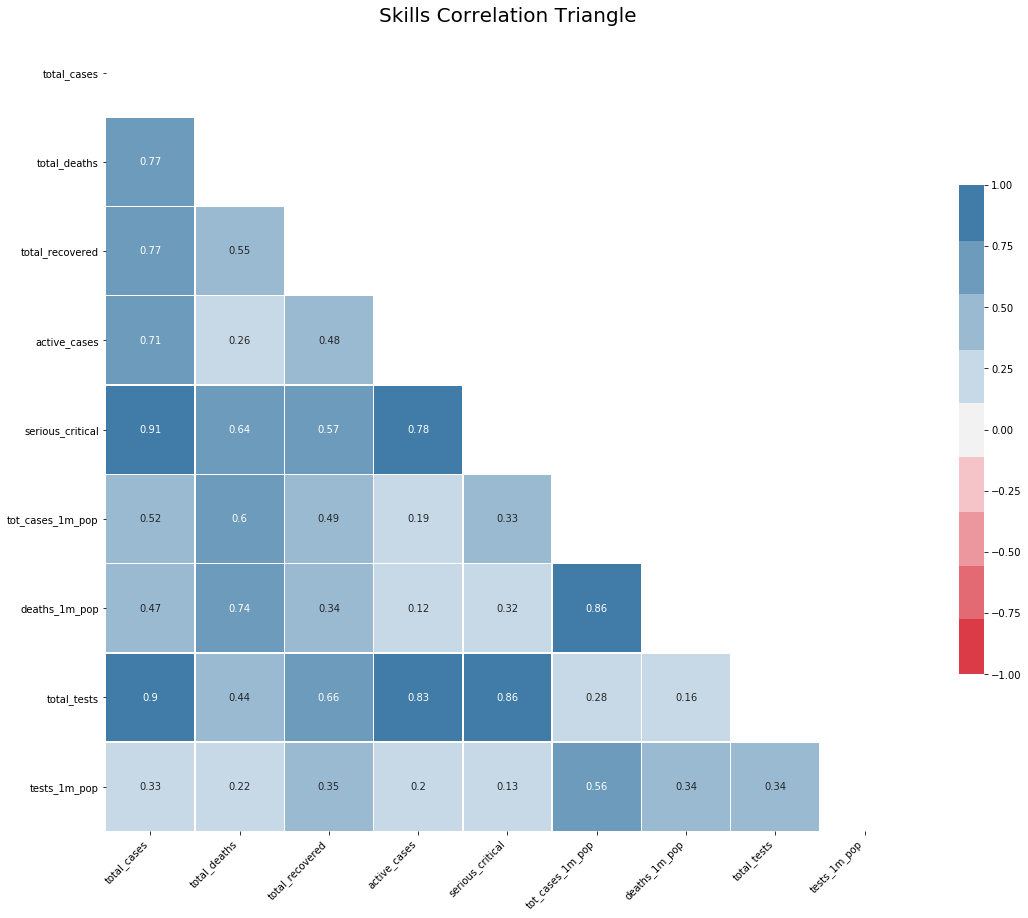

In [11]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (18, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 240, n = 9)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5}, annot=True)

ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

# Add title
ax1.set_title("Skills Correlation Triangle", fontsize = 20)
plt.show()

## 4. PCA Process

In [12]:
# Principal Component Analysis
pca = PCA(n_components = 5)
pca_data = pca.fit_transform(x)
len(pca_data)

23

In [13]:
# Create and show principal components DataFrame
df_pca = pd.DataFrame(data = pca_data, columns = ["PC1", "PC2", "PC3", "PC4", "PC5"])
df_pca = pd.concat([df_pca, raw_data["country"]], axis = 1)
df_pca = df_pca[df_pca["PC1"].notnull()]
df_pca.head(10)

,PC1,PC2,PC3,PC4,PC5,country
0,3.010946,-1.106548,-1.538143,-0.744537,1.867200,UK
1,3.622117,-0.934367,-0.350505,0.786769,0.140748,Italy
2,2.663860,0.465325,-1.963591,-0.526797,0.051891,France
3,4.961680,-1.656644,0.288011,1.329383,-0.636045,Spain
4,1.167590,-2.749455,0.565900,-1.362717,-0.663139,Belgium
5,1.873211,1.036531,0.387135,1.946171,0.042325,Germany
6,-0.882779,-0.577414,-0.983927,-0.340846,-0.378428,Netherlands
7,-0.531377,-0.759451,-0.713800,-0.693680,-0.864286,Sweden
8,4.903984,4.427586,1.347579,-1.263349,-0.395209,Russia
9,-0.635884,-1.036954,0.529744,0.009586,-0.489700,Switzerland


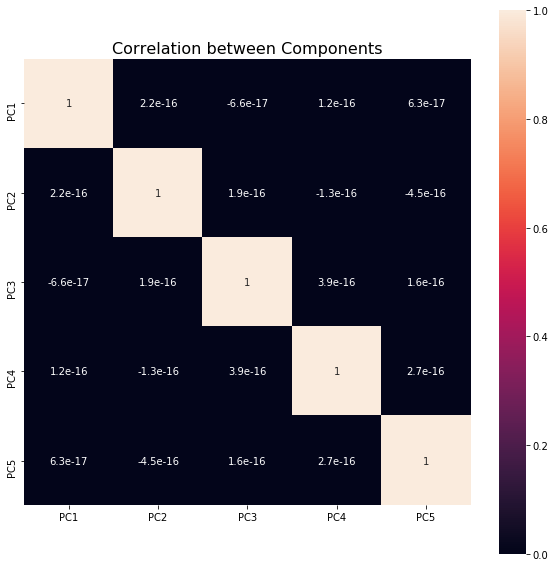

In [14]:
# Show correlation between components
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(df_pca.corr(), square=True, annot=True)
ax.set_title("Correlation between Components", fontsize = 16)
plt.show()

## 5. PCA Variance Ratio

In [15]:
# The explained variance tells us how much information (variance) can be attributed to each of the principal components
list(pca.explained_variance_ratio_)

[0.5726599992868926,
 0.20181964978231057,
 0.1049739562767577,
 0.05578559305363561,
 0.03665109363620433]

In [16]:
# Create horizontal bar chart data
bars = ("PC1", "PC2", "PC3", "PC4", "PC5")
y_pos = np.arange(len(bars))
values = pca.explained_variance_ratio_ * 100
cum = np.cumsum(values)

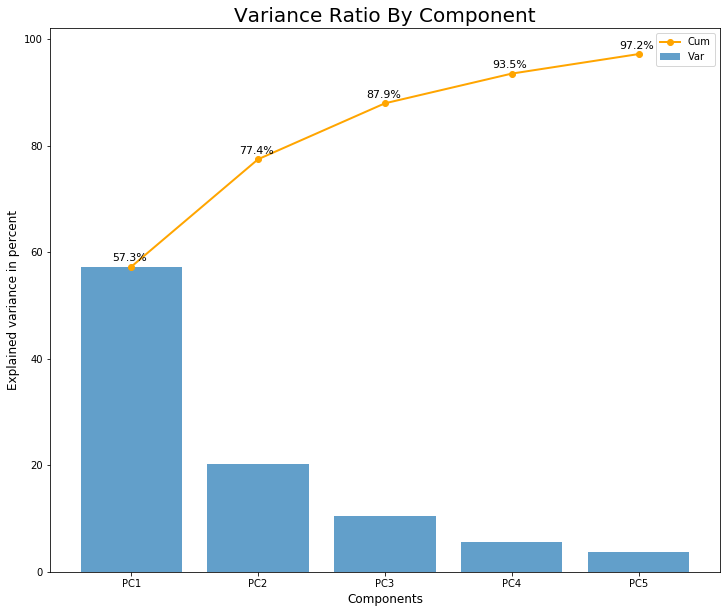

In [17]:
fig, ax2 = plt.subplots(figsize = (12, 10))

plt.bar(y_pos, values, align = "center", alpha = 0.7)
plt.xticks(y_pos, bars)
plt.plot(y_pos, cum, color = "orange", linewidth = 2, marker="o")
plt.title("Variance Ratio By Component", fontsize = 20)

# Add bar labels
for i, v in enumerate(cum):
    ax2.text(i - .15, v + 1, (str(round(v, 1))+"%"), color = "black", fontweight = "normal", fontsize = 11)

# Plot setup
plt.xlabel("Components", fontsize = 12)
plt.ylabel("Explained variance in percent", fontsize = 12)
plt.legend(("Cum", "Var"), loc = "best")
plt.show()

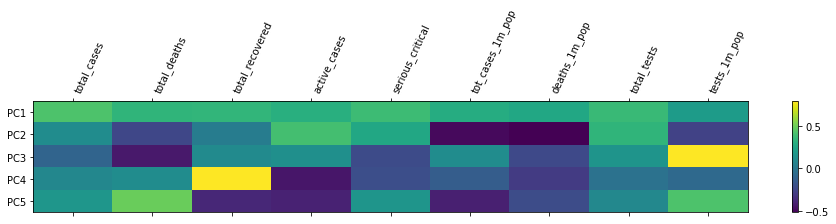

In [18]:
# Create a matshow plot of the Principal Components dependencies
fig = plt.figure(figsize = (16, 2))
plt.matshow(pca.components_, cmap = "viridis", fignum = fig.number, aspect = "auto")
plt.yticks([0, 1, 2, 3, 4], ["PC1", "PC2", "PC3", "PC4", "PC5"], fontsize = 10)
plt.colorbar()
plt.xticks(range(len(col_list)), col_list, rotation = 65, ha = "left")
plt.show()

## 6. PCA Plane Visualization

### 6.1. 2D Chart - The first 2 components

In [19]:
# Show the total explained variance ratio of model: Only 2 components
n_components = 2
sum(pca.explained_variance_ratio_[0:n_components]) * 100

77.44796490692032

In [20]:
n_vectors = 2
lengths = pca.explained_variance_[0:n_vectors]
vectors = pca.components_[0:n_components, 0:n_vectors]
means = pca.mean_[0:n_vectors]

In [21]:
# Function to draw vectors on plane
def draw_vector(v0, v1, ax = None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle = "->", linewidth = 2, shrinkA = 0, shrinkB = 0, color = "#ff7f0e")
    ax.annotate("", v1, v0, arrowprops = arrowprops)

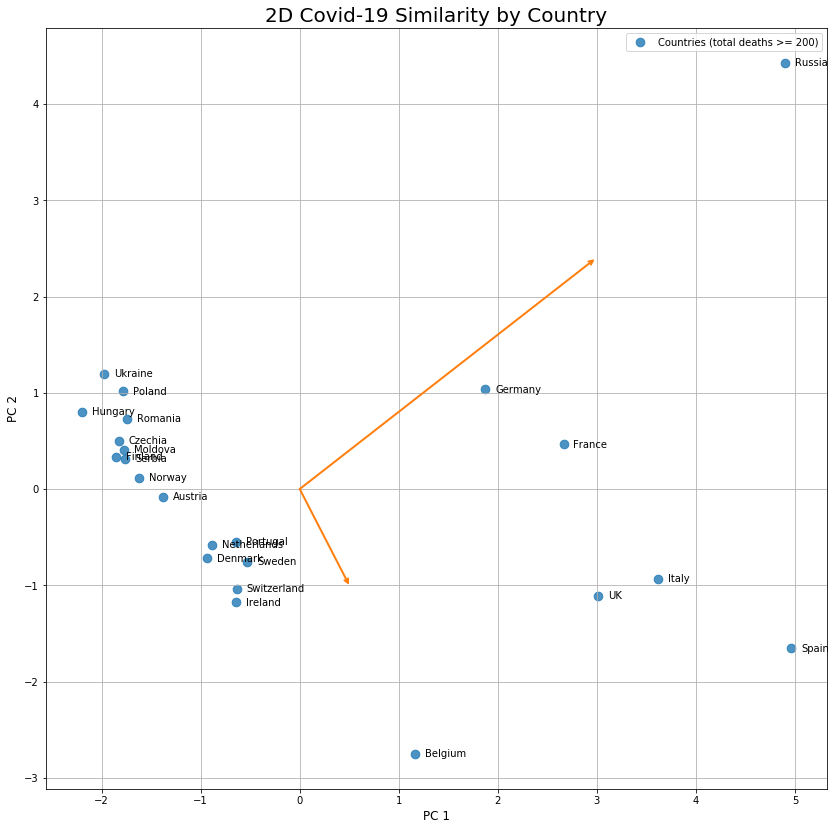

In [22]:
fig, ax3 = plt.subplots(figsize = (14, 14))

# Create 2D scatter plot
plot = sns.regplot(ax = ax3, data = df_pca, x = "PC1", y = "PC2", fit_reg = False
                   , marker = "o", color = "#1f77b4", scatter_kws = {"s": 75})

# Add annotations one by one with a loop
for ix in range(0, df_pca.shape[0]):
    plot.text(df_pca.PC1[ix] + 0.1, df_pca.PC2[ix] - 0.03, df_pca.country[ix], 
              horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Drawing the eigen-vectors
for length, vector in zip(lengths, vectors):
    v = vector * 3 * np.sqrt(length)
    draw_vector(means, means + v)

# Plot setup
ax3.set_xlabel("PC 1", fontsize = 12)
ax3.set_ylabel("PC 2", fontsize = 12)
ax3.set_title("2D Covid-19 Similarity by Country", fontsize = 20)
ax3.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax3.grid()

### 6.2. 3D Chart - The first 3 components

In [23]:
# Show the total explained variance ratio of model: Only 3 components
sum(pca.explained_variance_ratio_[0:3]) * 100

87.94536053459609

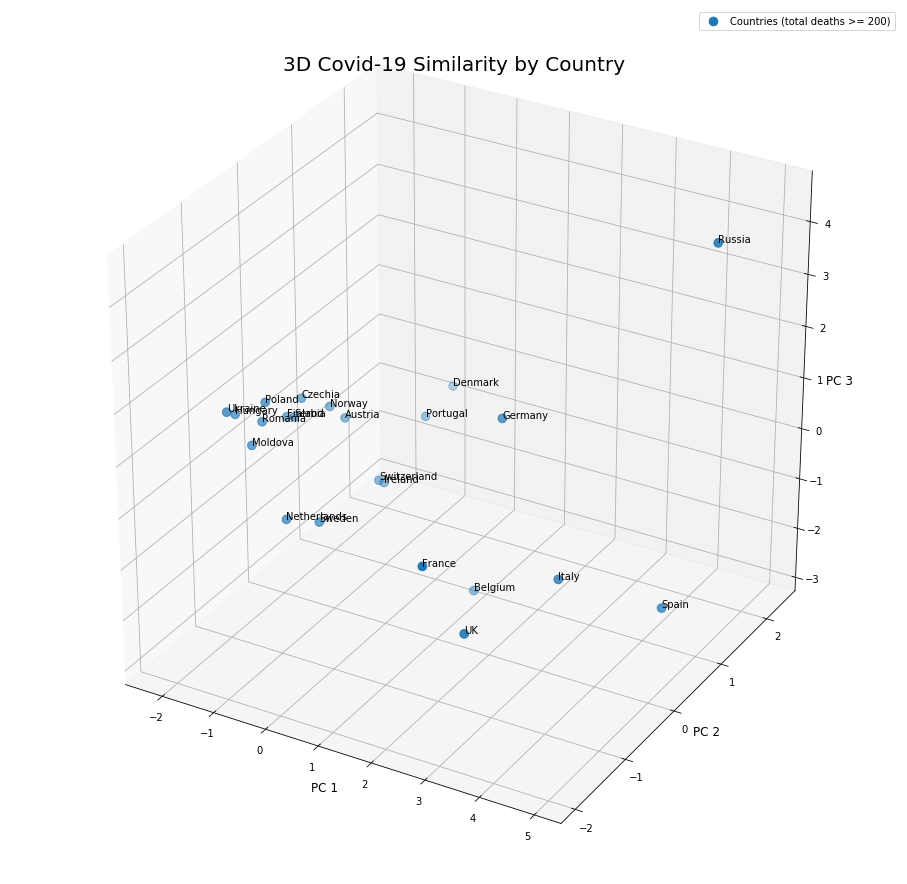

In [24]:
# Create 3D scatter plot
fig = plt.figure(figsize = (16, 16))
ax4 = fig.add_subplot(111, projection = "3d")

# Get (x, y, z) axis values
xx = df_pca.loc[:,["PC1"]].values
zz = df_pca.loc[:,["PC2"]].values
yy = df_pca.loc[:,["PC3"]].values

# Plot values
ax4.scatter(xx, yy, zz, c = "#1f77b4", marker = "o", s = 75)

# Add annotations one by one with a loop
for ix in range(0, len(x)):
    ax4.text(float(xx[ix]), float(yy[ix]), float(zz[ix]), df_pca.country[ix], 
             horizontalalignment = "left", size = "medium", color = "black", weight = "normal")

# Plot setup
ax4.set_xlabel("PC 1", fontsize = 12)
ax4.set_ylabel("PC 2", fontsize = 12)
ax4.set_zlabel("PC 3", fontsize = 12)
ax4.set_title("3D Covid-19 Similarity by Country", fontsize = 20)
ax4.legend(["Countries (total deaths >= " + str(min_deaths) + ")"])
ax4.grid()

## 7. Analysis of Similarity

### 7.1. Transpose the matrix by Countries

In [25]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,country
0,3.010946,-1.106548,-1.538143,-0.744537,1.867200,UK
1,3.622117,-0.934367,-0.350505,0.786769,0.140748,Italy
2,2.663860,0.465325,-1.963591,-0.526797,0.051891,France
3,4.961680,-1.656644,0.288011,1.329383,-0.636045,Spain
4,1.167590,-2.749455,0.565900,-1.362717,-0.663139,Belgium


In [26]:
# Transpose the matrix
df_temp = df_pca.copy()
df_trans = df_temp.drop(['country'], axis = 1).T
df_trans.columns = list(df_temp['country'])
df_trans.head()

,UK,Italy,France,Spain,Belgium,Germany,Netherlands,Sweden,Russia,Switzerland,...,Poland,Austria,Ukraine,Denmark,Hungary,Finland,Czechia,Serbia,Norway,Moldova
PC1,3.010946,3.622117,2.663860,4.961680,1.167590,1.873211,-0.882779,-0.531377,4.903984,-0.635884,...,-1.784292,-1.377708,-1.978953,-0.936790,-2.198341,-1.855857,-1.826263,-1.762138,-1.623701,-1.771328
PC2,-1.106548,-0.934367,0.465325,-1.656644,-2.749455,1.036531,-0.577414,-0.759451,4.427586,-1.036954,...,1.015172,-0.081132,1.197425,-0.719585,0.802265,0.334317,0.499768,0.312722,0.115645,0.409540
PC3,-1.538143,-0.350505,-1.963591,0.288011,0.565900,0.387135,-0.983927,-0.713800,1.347579,0.529744,...,-0.476568,0.619059,-0.993911,2.324420,-0.642995,-0.020173,0.233492,0.036547,0.569519,-0.750074
PC4,-0.744537,0.786769,-0.526797,1.329383,-1.362717,1.946171,-0.340846,-0.693680,-1.263349,0.009586,...,0.227298,0.170076,0.209513,-0.108128,0.233907,0.151002,0.196131,0.125401,-0.049011,0.022667
PC5,1.867200,0.140748,0.051891,-0.636045,-0.663139,0.042325,-0.378428,-0.864286,-0.395209,-0.489700,...,0.099633,0.186583,-0.150316,1.095434,0.061254,0.100645,0.357054,-0.019488,0.262565,-0.422236


### 7.2. Calculate Pearson correlation matrix

In [27]:
# Calculate the correlation matrix
corr = df_trans.corr(method = 'pearson')
corr.iloc[:10, :10]

,UK,Italy,France,Spain,Belgium,Germany,Netherlands,Sweden,Russia,Switzerland
UK,1.000000,0.780805,0.795748,0.627029,0.507576,0.138088,-0.007016,0.309864,0.236764,-0.412836
Italy,0.780805,1.000000,0.755496,0.971277,0.670983,0.618811,-0.275163,0.808132,0.314398,-0.120942
France,0.795748,0.755496,1.000000,0.615044,0.173848,0.512553,-0.046579,0.546992,0.633620,-0.739147
Spain,0.627029,0.971277,0.615044,1.000000,0.739785,0.655212,-0.407262,0.891783,0.290245,0.069739
Belgium,0.507576,0.670983,0.173848,0.739785,1.000000,0.017178,-0.667306,0.551380,0.103167,0.458580
Germany,0.138088,0.618811,0.512553,0.655212,0.017178,1.000000,0.031618,0.773828,0.239881,-0.166918
Netherlands,-0.007016,-0.275163,-0.046579,-0.407262,-0.667306,0.031618,1.000000,-0.572536,-0.594295,-0.291665
Sweden,0.309864,0.808132,0.546992,0.891783,0.551380,0.773828,-0.572536,1.000000,0.531814,0.024899
Russia,0.236764,0.314398,0.633620,0.290245,0.103167,0.239881,-0.594295,0.531814,1.000000,-0.575502
Switzerland,-0.412836,-0.120942,-0.739147,0.069739,0.458580,-0.166918,-0.291665,0.024899,-0.575502,1.000000


### 7.3. Plot the correlation triangle

In [28]:
# Create Players Correlation Triangle plot
def plotCorrTriangle(corr):
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (16, 16))
    
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(10, 240, n=9)
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask = mask, cmap = cmap, vmin = -1, vmax = 1, center = 0,
                square = True, linewidths = .5, cbar_kws = {"shrink": .5})

    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right');

    # Add title
    ax.set_title("Correlation Triangle between Countries", fontsize = 20)

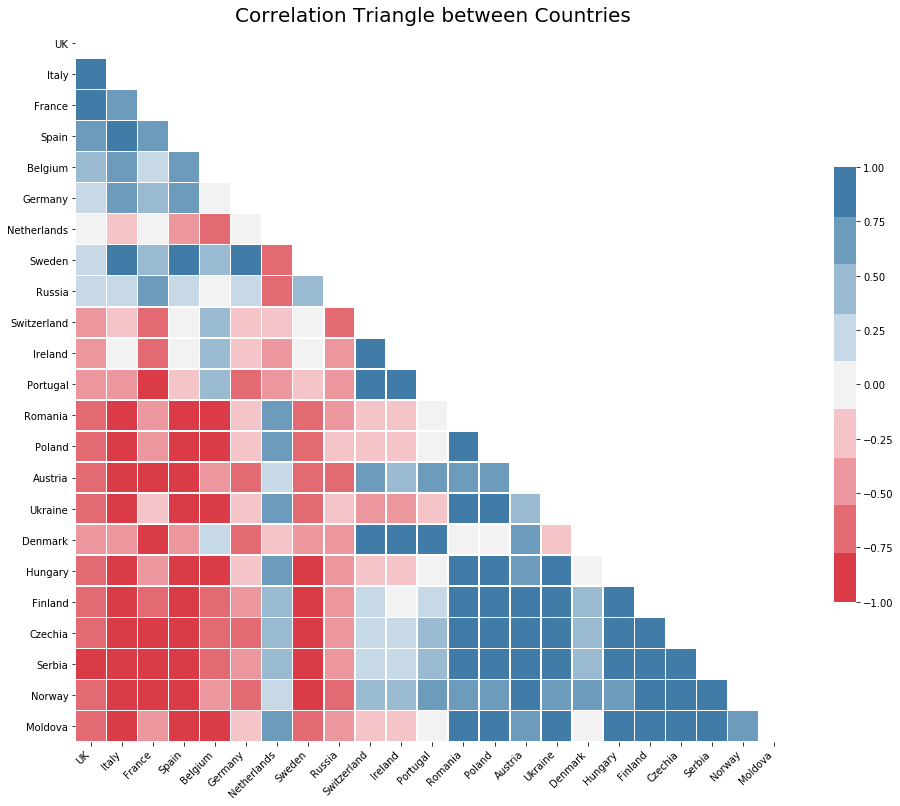

In [29]:
# Plot Correlation Triangle
plotCorrTriangle(corr)

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>